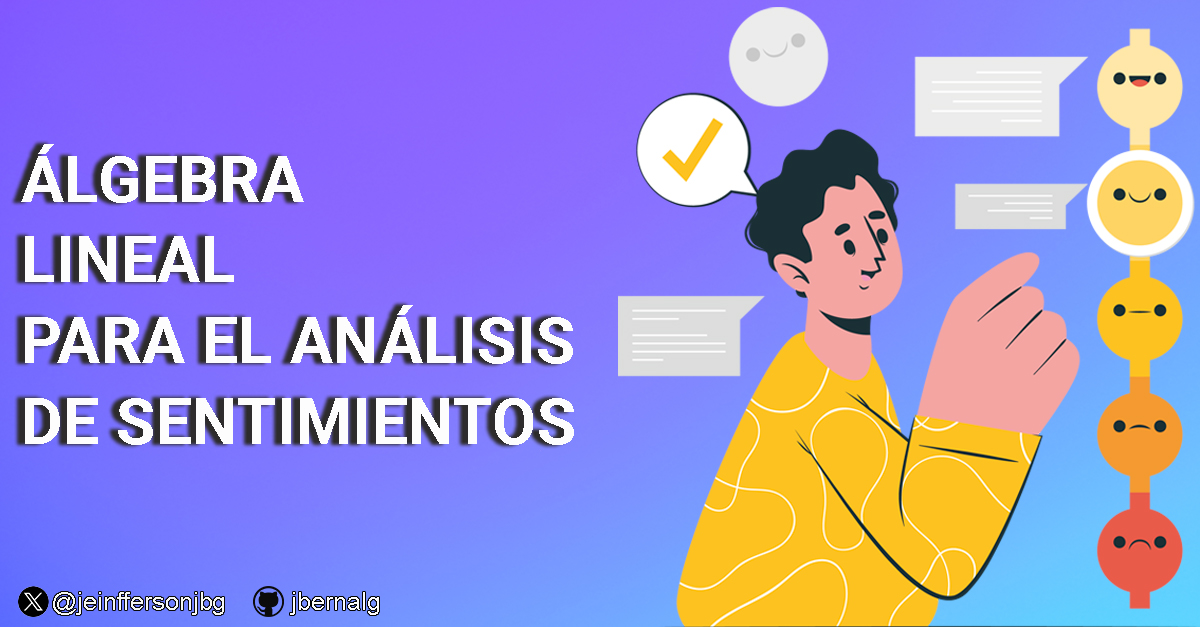

# Álgebra Lineal en el Análisis de Sentimientos 

El proyecto consiste en crear un algoritmo que nos indique que tan positivo, neutral o negativo son una serie de tweets, utilizando conceptos de álgebra lineal.

Vamos a utilizar el concepto de **Producto Interno** de vectores y sus propiedades para definir insight relevantes como la _Calidad del resultado_ y el _Score Sentimental_ que serán de mucha utilidad para determinar el sentimiento de cada tweet.

En lo que sigue verémos un breve repaso de la teoría que implementarémos en el proyecto, la carga de los datos, limpieza de los mismos, una breve explicación del análisis que se va a realizar y finalmente la ejecución.

# Conceptos de Álgebra

Vamos a dar un breve repaso por algunos conceptos de Álgebra Lineal que serán utilizados en el proyecto. En gran parte de ellos, se explica como implementarlo en Python utilizando la librería Numpy por lo que la importamos.

In [57]:
import numpy as np

## Uno Vector

Los *uno vectores* son $n$-vectores en los cuales todas las entradas son igual a uno. Algunas veces son representados como $\mathbf{1}_{n}$ pero usualmente es denotado simplemente como $\mathbf{1}$.  
Un ejemplo sería el uno vector de dimensión 2: $\mathbf{1} = (1,1)$.  

Para crear un _uno vector_ en python procedemos como sigue:

In [58]:
# vector en 3D
v_one = np.ones(3)
v_one

array([1., 1., 1.])

## Vectores Unitarios

El *vector unitario* $\mathbf{e}_{i}$ es aquel en donde todas las entradas son cero salvo la $i$-ésima.  
Por ejemplo, si $\mathbf{e}_{1}$, $\mathbf{e}_{2}$ y $\mathbf{e}_{3}$ son 3-vectores unitarios estos se ven como:
$$
\mathbf{e}_{0} =  \begin{bmatrix}1\\ 0\\ 0 \end{bmatrix}, \qquad \mathbf{e}_{1} =  \begin{bmatrix}0\\ 1\\ 0 \end{bmatrix}, \qquad \mathbf{e}_{2} =  \begin{bmatrix}0\\ 0\\ 1 \end{bmatrix}
$$
Una forma de representar a los vectores unitarios es la siguiente:
$$
\left(e_{i}\right)_{j} =  \left \{ \begin{matrix} 1 & \text{si }i=j
\\ 0 & \text{si }i\neq j\end{matrix}\right. 
$$

## Transposición de Vectores

Los vectores tienen dos formas de representarse:

**Vector Columna**
$$
\vec{a} = \begin{bmatrix}a_{0}\\ a_{1}\\ \vdots \\ a_{n-1}\end{bmatrix} 
$$

**Vector Renglón**
$$
\vec{a} = [a_{0}\; a_{1}\; \cdots \; a_{n-1}]
$$

Por lo general, cuando se habla de un vector se refiere a un _vector columna_. La operación de _Transposición_ nos permite cambiar de vectores columnas a vectores renglón sin modificar al vector que se transponga. Retomemos el vector $\vec{a}$, denotarémos como $\vec{a}^{T}$ al vector transpuesto de $\vec{a}$:

$$
\vec{a}^{T} = \begin{bmatrix}a_{0}\\ a_{1}\\ \vdots \\ a_{n-1}\end{bmatrix}^{T} = [a_{0}\; a_{1}\; \cdots \; a_{n-1}]
$$

La operación _transpuesta de un vector_ podemos realizarla en Python como sigue:


In [59]:
a = np.array([6,1,4])
tras = a.T
tras

array([6, 1, 4])

### Propiedades de la Transposición

- **Transposición de un vector transpuesto**: es posible transponer un vector transpuesto
$$
\left(\vec{a}^{T}\right)^{T} = \left(\begin{bmatrix}a_{0}\\ a_{1}\\ \vdots \\ a_{n-1}\end{bmatrix}^{T}\right)^{T} = [a_{0}\; a_{1}\; \cdots \; a_{n-1}]^{T} = \begin{bmatrix}a_{0}\\ a_{1}\\ \vdots \\ a_{n-1}\end{bmatrix} = \vec{a}
$$


- **Transposición y el Producto Interno**: Consideremos los vectores $\vec{a}$ y $\vec{b}$ ambos de la misma dimensión. Definimos la operación $\vec{a}^{T}\vec{b}$ como:

$$
\vec{a}^{T}\; \vec{b} = [a_{0}\; a_{1}\; \cdots \; a_{n-1}]  \begin{bmatrix}b_{0}\\ b_{1}\\ \vdots \\ b_{n-1}\end{bmatrix} = a_{0}b_{0} + a_{1}b_{1} + \cdots + a_{n-1}b_{n-1} = \displaystyle\sum_{i=0}^{n-1} a_{i}b_{i}
$$

Lo cual coincide con la definición del producto interno. Así pues $<\vec{a},\vec{b}> = \vec{a}\cdot \vec{b} = \vec{a}^{T} \;\vec{b} = \displaystyle\sum_{i=0}^{n-1} a_{i}b_{i}$

## Producto Interno

El *Producto Interno* (Estandar) o simplemente *Producto Punto* de dos $n$-vectores $\vec{a}, \vec{b}$ se define como el escalar:

$$
<\vec{a}, \vec{b}> = \vec{a} \cdot \vec{b} = a_{0}b_{1}+a_{1}b_{1}+\cdots+a_{n-1}b_{n-1} = \displaystyle\sum_{i=0}^{n-1} a_{i}b_{i}
$$

que es la suma del producto de sus entradas.

Veamos cómo funciona en el siguiente ejemplo: si $\vec{a}=(1,2,3)$ y $\vec{b}=(4,5,6)$, entonces el producto punto será:

$$
\vec{a}\cdot\vec{b} = (1,2,3)\cdot(4,5,6) = 1\cdot 4+2\cdot 5+3\cdot 6 = 4+10+18 = 32
$$

Para reproducir el ejemplo anterior en Python, procedemos como sigue:


In [60]:
# creamos los vectores a y b
a = np.array([1,2,3])
b = np.array([4,5,6])

# calculamos el producto punto
a_b = np.dot(a,b)
print(a_b)

# calculo del producto punto con el operador @
a_b = a.T@b
print(a_b)

32
32


## Propiedades del Producto Interno

Sean $\vec{a},\vec{b}$ dos $n$-vectores y $\alpha$ un escalar. El producto interno entre $\vec{a}$ y $\vec{b}$ cumple las siguientes propiedades:

### **Conmutatividad:**

 $\vec{a}^{T}\vec{b} = \displaystyle\sum_{i=0}^{n-1} a_{i}b_{i} = \displaystyle\sum_{i=0}^{n-1} b_{i}a_{i} = \vec{b}^{T}\vec{a}$

### **Asociatividad con multiplicación escalar:**

$\left(\alpha \vec{a}\right)^{T}\vec{b} = \alpha\left(\vec{a}^{T}\vec{b}\right)$

### **Distribución en la adición de vectores:**

$\left(\vec{a} + \vec{b}\right)^{T}\vec{c} = \vec{a}^{T}\vec{c} + \vec{b}^{T}\vec{c}$

### **Proyección**

Si $\vec{a}$ es un $n$-vector entonces $\hat{e}_{i}^{T}\vec{a} = a_{i}$. 

_Ejemplo_: Tenemos el vector $$\mathbf{a} =  \begin{bmatrix}3\\ 2\\ 1 \end{bmatrix}$$ y los siguientes vectores unitarios:


$$
\mathbf{e}_{0} =  \begin{bmatrix}1\\ 0\\ 0 \end{bmatrix}, \qquad \mathbf{e}_{1} =  \begin{bmatrix}0\\ 1\\ 0 \end{bmatrix}, \qquad \mathbf{e}_{2} =  \begin{bmatrix}0\\ 0\\ 1 \end{bmatrix}
$$ 

Entonces, segun la propiedad, tenemos:
$$
\hat{e}_{0}^{T}\vec{a} = [1,0,0]\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 3
$$
$$
\hat{e}_{1}^{T}\vec{a} = [0,1,0]\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 2
$$
$$
\hat{e}_{2}^{T}\vec{a} = [0,0,1]\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 1
$$

La forma de crear el ejemplo anterior en Python es mediante el producto punto. Veamos cómo realizarlo:

In [61]:
# creamos el vector y los vectores unitarios
a = np.array([3,2,1])
e_0 = np.array([1,0,0])
e_1 = np.array([0,1,0])
e_2 = np.array([0,0,1])

# Proyeccion en la direccion e_0
proy_e0 = e_0.T@a
print(f'Proyeccion sobre el vector unitario e_0: {proy_e0}')

# Proyeccion en la direccion e_1
proy_e1 = e_1.T@a
print(f'Proyeccion sobre el vector unitario e_1: {proy_e1}')

# Proyeccion en la direccion e_2
proy_e2 = e_2.T@a
print(f'Proyeccion sobre el vector unitario e_2: {proy_e2}')

Proyeccion sobre el vector unitario e_0: 3
Proyeccion sobre el vector unitario e_1: 2
Proyeccion sobre el vector unitario e_2: 1


### **Suma de elementos de un vector.**  

$\mathbf{1}^{T}a = a_{0}+a_{1}+\cdots+a_{n-1}$

Ejemplo: Tenemos el siguiente vector $$\mathbf{a} =  \begin{bmatrix}3\\ 2\\ 1 \end{bmatrix}$$ Para sumar sus elementos, realizamos el producto punto entre el vector $a$ y el uno vector traspuesto 
$$\mathbf{1} =  \begin{bmatrix}1\\ 1\\ 1 \end{bmatrix}$$

- $\mathbf{1}^{T}a = [1,1,1] \begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 3 + 2 + 1 = 6$

Para recrear el ejemplo anterior en Python procedemos como sigue:

In [62]:
# creamos los vectores uno vector y a con la misma dimension
a = np.array([3,2,1])
v_uno = np.ones(3)

# Calculamos la suma de los elementos
sum_ele = v_uno.T@a
sum_ele

6.0

### **Promedio de entradas de un vector.** 

$(\mathbf{1}/n)^{T}\vec{a} = (a_{0}+a_{1}+\cdots+a_{n-1})/n$

Ejemplo: Tenemos el siguiente vector $$\mathbf{a} =  \begin{bmatrix}3\\ 2\\ 1 \end{bmatrix}$$ Para calcular el promedio de las entradas del vector se procede como sigue:

- $(\mathbf{1}/n)^{T}\vec{a} = ([1,1,1])/3\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = [1/3,1/3,1/3]\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 2$

Vamos a realizar el ejemplo anterior en Python:

In [63]:
# creamos los vectores uno vector y a
a = np.array([3,2,1])
v_uno = np.ones(3)

# calculamos el tamaño del vector a
size_a = a.size

# Calculamos el promedio de las entradas del vector a
avg_a = round((v_uno/size_a).T@a)
avg_a

2

### **Suma de cuadrados de un vector.** 

$\vec{a}^{T} \;\vec{a} = a_{0}^{2}+a_{1}^{2}+\cdots+a_{n-1}^{2}$

Ejemplo: Tenemos el siguiente vector $$\mathbf{a} =  \begin{bmatrix}3\\ 2\\ 1 \end{bmatrix}$$ Para calcular la suma de los cuadrados de un vector se procede como sigue

- $\vec{a}^{T} \;\vec{a} = [3,2,1]\begin{bmatrix}3\\ 2\\ 1 \end{bmatrix} = 3\cdot 3 + 2\cdot 2 + 1\cdot 1 = 9 + 4 + 1 = 14$

Vamos a crear el ejemplo anterior en Python como sigue:

In [64]:
# creamos el vector a
a = np.array([3,2,1])

# calculamos la suma de los cuadrados
sum_cu = a.T@a
sum_cu

14

# Carga de Datos

Vamos a trabajar con un conjunto de tweet almacenados en el archivo _tweet.txt_ el cual, contiene un tweet por cada línea.

In [65]:
# Cargamos el archivo e imprimos la cantidad de tweets
with open('tweet.txt', 'r') as file:
    lines = file.read().splitlines()
    print(len(lines))

7


In [66]:
# creamos un diccionario y le pasamos como clave, una lista con el numero que representa cada tweet
diccionary = dict.fromkeys(range(1, len(lines)+1))

# asignamos a cada numero, el tweet correspondiente
i = 0
for key in diccionary:
    diccionary[key] = lines[i]
    i += 1

diccionary

{1: 'Gran mexicano y excelente en su área, su muerte es una enorme perdida y debería ser luto nacional!!!',
 2: 'Vaya señora que bueno que se asesora por alguien inteligente no por el ignorante del Gatt.',
 3: 'Se me ocurre y sin ver todos los videos que me informéis por dónde empiezo. Entiendo que os tendría que decir quién soy y que quiero, vamos conocerme para asesorarme bien.',
 4: 'Un saludo. Soy docente universitario, estoy intentando preparar mis clases en modo bien didáctico, (le llamo modo noticiero), descargue una plataforma gratuita de grabación y transmisión de vídeo, se llama Obs estudio!bueno la sigo remando con sus funciones pero sé que saldrá algo!',
 5: 'Todo esta mal economicamente! Esto es un desastre! La perdida es cada vez mayor',
 6: 'La gripa esta afectando a toda mi familia.... Té de Jengibre urgente!!',
 7: 'Las pinturas de Botero reflejan el arte de lo grotesco'}

Ahora tenemos un Diccionario con los tweets que vamos a analizar

# Limpieza de tweets

Creamos una función que elimine caracteres no relevantes como signos de puntuación y vocales acentuadas, convierta todas las letras en minúscula y devuelva una lista de palabras. Esto lo realizamos para que al buscar en el tweet las palabras de interés, se evite la falta de coincidencia debido a un acento o a una letra en mayúscula.

In [67]:
def deleteChar(string):
    
    # letras en minuscula
    string = string.lower()

    # lista de signos de puntuacion
    sign = [',', '.', ';', ':', '!', '?']

    # diccionario con vocales acentuadas
    acent = {
        'á': 'a',
        'é': 'e',
        'í': 'i',
        'ó': 'o',
        'ú': 'u',
        }
    
    # reemplazar signos de puntuacion
    for char in sign:
        string = string.replace(char,' ')

    # reemplazar vocales acentuadas
    for key in acent:
        if key in string:
            string = string.replace(key, acent[key])

    # lista de palabras de la cadena
    string = string.split(' ')

    # lista de palabras como elementos
    string = [x for x in string if x !='']

    return string

# Entendiendo el Análisis

Vamos a explicar de qué se trata el análisis para comprender el procedimiento más delante. Supongamos que el tweet que vamos analizar es el siguiente: 

> _Gran mexicano y excelente en su área, su muerte es una enorme perdida y debería ser luto nacional!!!_. 

Vamos a buscar cadenas específicas en los tweets y contar la cantidad de veces que aparecen. Supongamos que las palabras objetivos son _muerte, perdida, luto, excelente, gran y positivo_. Construimos un vector de frecuencia $\vec{w}$ con el conteo de las palabras objetivos que aparecen en el tweet.

$$
\vec{w} = \begin{bmatrix}1\\ 1 \\ 1\\ 1\\ 1 \\0 \end{bmatrix}
$$

Clasificamos las palabras objetivos en sentimientos: _excelente, gran y positivo_ como **Positivas**; _perdida_ como **Neutra**; _muerte y luto_ como **Negativas**.

Luego creamos un vector de frecuencia según el sentimiento $\vec{s}$ el cual contiene en el primer elemento la cantidad de palabras _positivas_ en el tweet, en el segundo elemento la cantidad de palabras _neutras_ y en el tercer elemento la cantidad de palabras _negativas_. Nos queda:

$$
\vec{s} = \begin{bmatrix}2\\ 1 \\ 2\end{bmatrix}
$$

A partir de $\vec{s}$, podemos calcular _El promedio de las entradas de un vector de frecuencia según el sentimiento_ $avg(\vec{s})$ que es una medida de la calidad de los resultados en función de los sentimientos encontrados en el tweet. Se calcula como sigue:

$$avg(\vec{s}) = (\mathbf{1}/n)^{T}\vec{s}$$

donde $n$ es el tamaño del vector $\vec{s}$

También tenemos _El promedio de las entradas de un vectos de palabras_ $avg(\vec{w})$ que representa el porcentaje de palabras de la base de datos definidas como positivas, negativas y neutras que hay en el tweet. Mientras más alto es este valor, mayor es la calidad de los resultados ya que el número de coincidencias es mayor. Se calcula de la siguiente manera:

$$avg(\vec{w}) = (\mathbf{1}/n)^{T}\vec{w}$$

donde $n$ es el tamaño del vector $\vec{w}$

Otra métrica de mucha utilidad es el _Score Sentimental_ ($score(\vec{s})$) que se interpreta como una medida de la emoción del tweet. Es una medida muy subjetiva ya que depende de las palabras consideradas como positivas, negativas y neutras. Mientras más palabras negativas hayan, el valor de esta medida se aproxima a -1 y mientras más palabras positivas hayan, el valor tiende a 1. Se calcula como sigue:

$$score(\vec{s}) = [1\; 0\; -1] \begin{bmatrix} s_{0} \\ s_{1} \\s_{2} \end{bmatrix}$$

Siguiendo con el ejemplo, calculamos los promedios $avg(\vec{w})$ y $avg(\vec{s})$

In [68]:
# importamos la libreria Numpy
import numpy as np

# definimos los vectores s y w
w = np.array([1,1,1,1,1,0])
s = np.array([2,1,2])

In [69]:
# calculamos los promedios
avgw = round((np.ones(w.size)/float(w.size)).T@w, 3)
avgs = round((np.ones(s.size)/float(s.size)).T@s, 3)

print(f'Avg(w): {avgw}, Avg(s): {avgs}')

Avg(w): 0.833, Avg(s): 1.667


El valor de $avg(\vec{w})$ esta normalizado, es decir, su valor va de 0 a 1. El valor arrojado indica que 83% de las palabras objetivos están en el tweet lo que garantiza una alta calidad en los resultados del $score(\vec{s})$.

El valor de $avg(\vec{s})$ debemos normalizarlo para darle una mejor interpretación. Procedemos a hacerlo:

In [70]:
# asignamos a variables la cantidad de palabras positivas, negativas y neutras
pos = 3
neu = 1
neg = 2

# dividimos cada valor de s por la cantidad de palabras etiquetadas (postiva, negativa, neutra) correpondiente
s = np.array([2/pos, 1/neu, 2/neg])

# Calculamos nuevamente el promedio de s
avgs = round((np.ones(s.size)/float(s.size)).T@s, 3)

print(f'Avg(s): {avgs}')

Avg(s): 0.889


Ya con el valor de $avg(\vec{s})$ normalizado, podemos interpretar que el 89% de las palabras categorizadas en diferentes sentimientos están contenidas en el tweet, lo que garantiza la calidad en el resultado del $score(\vec{s})$. Ahora vamos a calcular el $score(\vec{s})$

In [71]:
score = np.array([1,0,-1])
scores = round(score.T@s, 3)

print(f'Score(s): {scores}')

Score(s): -0.333


El valor de $score$ arrojado es negativo cercano a cero, lo que indica que el tweet refleja un sentimiento negativo bajo. Combinando ambos resultados confirmamos la veracidad del resultado del $score$

# Aplicando el Análisis

El primer paso es seleccionar las palabras relacionadas a los sentimientos que buscamos estimar. Vamos a crear tres listas con palabras consideradas positivas, negativas y neutras. La elección de las palabras es muy subjetiva y depende del objetivo del investigador.

In [72]:
math_pos = ['excelente', 'gran', 'quiero', 'bien', 'positivo', 'bueno', 'inteligente']
math_neu = ['aprender', 'estudio', 'didactico', 'hacer', 'algo', 'modo', 'saldra', 'reflejan', 'pinturas']
math_neg = ['muerte', 'luto', 'ignorante', 'perdida', 'grotesco', 'gripa', 'afectando', 'mal', 'desastre']

Ahora, vamos a crear una función que reciba los tweets junto a los conjuntos de palabras objetivos, los limpie y calcule los promedios $avg(\vec{s})$, $avg(\vec{w})$ y el $score(\vec{s})$ para cada uno.

In [73]:
def Analys_Sentiment(string, pos:list, neu:list, neg:list):

    # Creamos una lista con todas las palabras a buscar
    match = pos + neu + neg

    # limpiamos los datos de caracteres no deseados y convertimos el tweet en una lista
    tweet_clear = deleteChar(string)

    # contar elementos de match dentro del tweet y crear el vector w
    # contar elementos positivos, negativos y neutros y crear el vector s
    w = []
    c_pos, c_neg, c_neu = 0,0,0

    for ele in match:
        count = 0
        count = tweet_clear.count(ele)
        w.append(count)

        if count > 0 and ele in pos:
            c_pos += 1
        elif count > 0 and  ele in neg:
            c_neg += 1
        elif count > 0 and ele in neu:
            c_neu += 1
    
    # convertimos w en vector
    w = np.array(w)

    # convertimos s en vector y normalizamos
    s = np.array([c_pos/(len(pos)), c_neu/(len(neu)), c_neg/(len(neg))])

    # calculamos avg(w)
    avgw = round((np.ones(w.size)/float(w.size)).T@w, 3)

    # calculamos avg(s)
    avgs = round((np.ones(s.size)/float(s.size)).T@s, 3)

    # calculamos el score sentimental
    score = np.array([1,0,-1])
    scores = round(score.T@s, 3)

    # retornamos los resultados
    return f'avg(w): {avgw}, avg(s): {avgs}, score: {scores}'



Finalmente, creamos un diccionario con el mismo tamaño del diccionario que contiene los tweets y guardamos los resultados para cada tweet.

In [74]:
# diccionario que guardara los resultados
dict_resultados = dict.fromkeys(range(1,len(lines)+1))

# recorremos cada tweet almacenado en diccionary, aplicamos la funcion antes creada
# y guardamos los resultado en dict_resultados
i = 1
for valor in diccionary.values():
    dict_resultados[i] = Analys_Sentiment(valor, math_pos, math_neu, math_neg)
    i += 1

# Mostramos los resultados
dict_resultados

{1: 'avg(w): 0.2, avg(s): 0.206, score: -0.048',
 2: 'avg(w): 0.12, avg(s): 0.132, score: 0.175',
 3: 'avg(w): 0.08, avg(s): 0.095, score: 0.286',
 4: 'avg(w): 0.32, avg(s): 0.28, score: 0.286',
 5: 'avg(w): 0.12, avg(s): 0.111, score: -0.333',
 6: 'avg(w): 0.08, avg(s): 0.074, score: -0.222',
 7: 'avg(w): 0.12, avg(s): 0.111, score: -0.111'}

# Conclusiones

De los resultados concluimos lo siguiente:

- El tweet mas positivo es el 4. A pesar que tiene el mismo _score_ que el tweet 3, la _calidad del resultado_ es mayor (0.32).

- El tweet mas negativo es el 5 con un _score_ de -0.333 y una _calidad del resultado_ de 0.12

- El tweet de mayor calidad, es decir, que contiene la mayor cantidad de coincidencias con las palbras buscadas, es el 4 con un valor de 0.32

Es importante destacar que los resultados varían de acuerdo a la elección de las palabras buscadas y el sentimiento al que pertenecen. Esto hace que los resultados sean muy subjetivos.

La forma en que el algoritmo calcula ambas medidas es contando las palabras clasificadas en los tres sentimientos y luego contrastando todas, dando mayor relevancia a la de mayor cantidad. Analicemos el tweet 1: tiene 3 palabras de sentimiento negativo (muerte, luto, perdida) y 2 palabras positivas (gran y excelente). La diferencia entre palabras positivas y negativas es de 1 dominando las negativas y, por tanto, su valor de _score_ refleja un sentimiento negativo bajo. Mientras mayor sea la diferencia, el valor de _score_ se aproxima a 1 o -1 dependiendo del sentimiento.    

> Este proyecto presenta una forma muy básica y aproximada de obtener el sentimiento de un tweet, por lo que no es muy preciso y no puede detectar la ironía o el sarcasmo que son recursos muy utilizado a la hora de expresar sentimientos. A pesar de las limitantes, es un muy buen proyecto para mostrar el uso del álgebra lineal en problemas reales.